# Menyanthes File
R.J. Caljé, Artesia Water

Menyanthes is a timeseries analysis program used by a lot of people in the Netherlands. In this example a Menyanthes-file with one observation-series is imported, and simulated. There are several stresses in the Menyanthes-file, among which are three groundwater extractions with a significant influence on groundwater head.


In [23]:
# First perform the necessary imports
import matplotlib.pyplot as plt
import pastas as ps
%matplotlib notebook

## 1. Importing the Menyanthes-file
Import the Menyanthes-file with observations and stresses. Then plot the observations, together with the diferent stresses in the Menyanthes file.

<IPython.core.display.Javascript object>


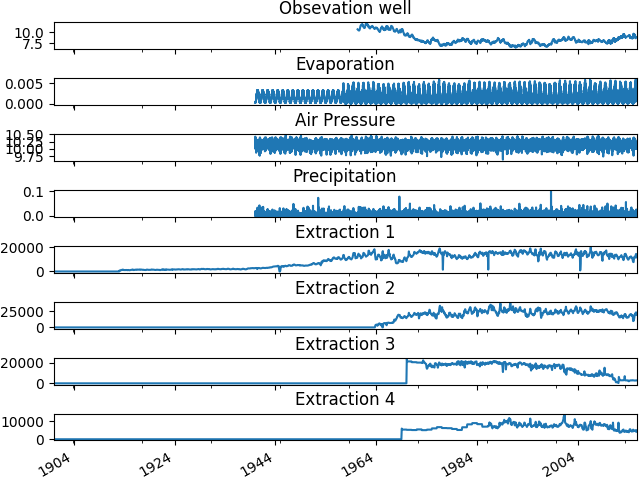

In [24]:
# how to use it?
fname = '../data/MenyanthesTest.men'
meny = ps.read.MenyData(fname)

# plot some series
f1, axarr = plt.subplots(len(meny.IN)+1, sharex=True)
oseries = meny.H['Obsevation well']["values"]
oseries.plot(ax=axarr[0])
axarr[0].set_title(meny.H['Obsevation well']["Name"])
for i, val in enumerate(meny.IN.items()):
    name, data = val
    data["values"].plot(ax=axarr[i+1])
    axarr[i+1].set_title(name)
plt.tight_layout(pad=0)
plt.show()

## 2. Run a model
Make a model with precipitation, evaporation and three groundwater extractions.

In [25]:
# Create the time series model
ml = ps.Model(oseries)

# Add precipitation
IN = meny.IN['Precipitation']['values']
IN.index = IN.index.round("D")
IN2 = meny.IN['Evaporation']['values']
IN2.index = IN2.index.round("D")
ts = ps.StressModel2([IN, IN2], ps.Gamma, 'Recharge')
ml.add_stressmodel(ts)

# Add well extraction 1
IN = meny.IN['Extraction 1']
# extraction amount counts for the previous month
ts = ps.StressModel(IN['values'], ps.Hantush, 'Extraction_1', up=False,
                kind="well")
ml.add_stressmodel(ts)

# Add well extraction 2
IN = meny.IN['Extraction 2']
# extraction amount counts for the previous month
ts = ps.StressModel(IN['values'], ps.Hantush, 'Extraction_2', up=False,
                kind="well")
ml.add_stressmodel(ts)

# Add well extraction 3
IN = meny.IN['Extraction 3']
# extraction amount counts for the previous month
ts = ps.StressModel(IN['values'], ps.Hantush, 'Extraction_3', up=False,
                kind="well")
ml.add_stressmodel(ts)

# Solve
ml.solve();

[[Fit Statistics]]
    # function evals   = 265
    # data points      = 1920
    # variables        = 15
    chi-square         = 23.787
    reduced chi-square = 0.012
    Akaike info crit   = -8400.571
    Bayesian info crit = -8317.170
[[Variables]]
    Recharge_A:         1286.46094 +/- 100.2827 (7.80%) (init= 1518.443)
    Recharge_n:         1.07328349 +/- 0.031957 (2.98%) (init= 1)
    Recharge_a:         588.395659 +/- 66.80592 (11.35%) (init= 100)
    Recharge_f:        -1.60658958 +/- 0.193941 (12.07%) (init=-1)
    Extraction_1_A:     0.00459511 +/- 0.000446 (9.70%) (init= 0.003777795)
    Extraction_1_rho:   5.36670548 +/- 0.140907 (2.63%) (init= 1)
    Extraction_1_cS:    503.697432 +/- 3.571885 (0.71%) (init= 100)
    Extraction_2_A:     0.00264617 +/- 0.000109 (4.12%) (init= 0.003159711)
    Extraction_2_rho:   1.66195814 +/- 0.179461 (10.80%) (init= 1)
    Extraction_2_cS:    396.712401 +/- 14.82555 (3.74%) (init= 100)
    Extraction_3_A:     0.00147492 +/- 0.000106 (7.

## 3. Plot the decomposition
Show the decomposition of the groundwater head, by plotting the influence on groundwater head of each of the stresses.

<IPython.core.display.Javascript object>


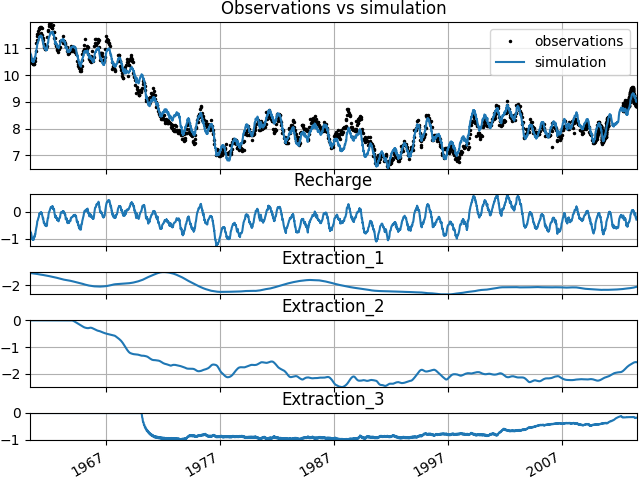

In [26]:
ax = ml.plots.decomposition(base=1.)
ax[0].set_title('Observations vs simulation')
ax[0].legend()
ax[0].figure.tight_layout(pad=0)